# Balanceando Datasets

Balancear datasets é uma etapa fundamental no processo de preparação de dados para machine learning. Quando se trata de treinar modelos de aprendizado de máquina, é essencial garantir que os dados de treinamento estejam equilibrados, ou seja, que não haja um viés significativo em relação a uma classe ou categoria específica em comparação com outras. Neste texto, discutiremos por que o balanceamento de datasets é importante e como realizar esse processo de forma eficaz.

**Por que balancear datasets?**

1. **Evitar Viés de Classe:** Dados desbalanceados podem levar a um viés no modelo de machine learning, uma vez que o modelo pode se tornar excessivamente inclinado para a classe majoritária. Isso ocorre porque o modelo tende a aprender mais sobre a classe com mais exemplos, enquanto ignora ou subestima as classes minoritárias.
    
2. **Melhorar o Desempenho Geral:** Modelos treinados em datasets balanceados tendem a ter um desempenho mais equilibrado em relação a todas as classes. Isso significa que o modelo será mais preciso na previsão de todas as categorias em vez de se concentrar apenas nas mais frequentes.
    
3. **Reduzir o Overfitting:** O desbalanceamento do dataset pode levar ao overfitting, onde o modelo aprende a classe majoritária com grande detalhe, mas falha em generalizar para as classes minoritárias. O balanceamento pode ajudar a reduzir o overfitting, tornando o modelo mais robusto.
    

**Como balancear datasets?**

Existem várias técnicas para balancear um dataset:

1. **Oversampling:** Esta técnica envolve a criação de cópias adicionais das amostras das classes minoritárias, aumentando assim a representação dessas classes. Isso pode ser feito de forma aleatória ou com técnicas mais avançadas, como o SMOTE (Synthetic Minority Over-sampling Technique), que gera amostras sintéticas com base nas existentes.
    
2. **Undersampling:** Aqui, reduz-se o número de amostras das classes majoritárias para torná-las comparáveis às classes minoritárias. Isso pode ser feito aleatoriamente ou usando métodos mais seletivos, como o NearMiss.
    
3. **Geração de Dados Sintéticos:** Além do SMOTE, outras técnicas de geração de dados sintéticos podem ser usadas para criar novas amostras para as classes minoritárias. Isso inclui ADASYN e Borderline-SMOTE.
    
4. **Peso das Classes:** Alguns algoritmos de machine learning permitem atribuir pesos diferentes às classes durante o treinamento. Isso dá mais importância às classes minoritárias, ajudando a equilibrar o modelo.
    
5. **Recolhimento de Dados:** Quando possível, coletar mais dados das classes minoritárias é a melhor abordagem, pois isso aumenta naturalmente a representação dessas classes.

Existem várias bibliotecas em Python que facilitam o processo de balanceamento de datasets para machine learning. Essas bibliotecas oferecem funções e classes que permitem aplicar técnicas de oversampling, undersampling e geração de dados sintéticos de forma conveniente. Aqui estão algumas das bibliotecas mais populares para balanceamento de datasets:

1. **Imbalanced-Learn (imblearn):** Essa é uma biblioteca muito conhecida e amplamente utilizada para lidar com datasets desbalanceados. Ela oferece uma ampla variedade de técnicas de oversampling, undersampling e geração de dados sintéticos, incluindo SMOTE, ADASYN, RandomOverSampler, RandomUnderSampler, entre outras.
    
    Site oficial: [Imbalanced-Learn (imblearn)](https://imbalanced-learn.org/stable/)
    
2. **Resampling do scikit-learn:** O scikit-learn, uma das bibliotecas mais populares para machine learning em Python, possui módulos de resampling que incluem técnicas de oversampling e undersampling. Embora não seja tão completo quanto o Imbalanced-Learn, pode ser uma opção conveniente se você já está familiarizado com o scikit-learn.
    
    Documentação do scikit-learn sobre resampling: [Resampling strategies for imbalanced datasets](https://scikit-learn.org/stable/over_sampling.html)
    
3. **SMOTE-variants:** Esta é uma extensão do Imbalanced-Learn que se concentra especificamente em diferentes variantes do SMOTE (Synthetic Minority Over-sampling Technique). Oferece uma seleção abrangente de métodos SMOTE para gerar dados sintéticos.
    
    GitHub: [SMOTE-variants](https://github.com/analyticalmindsltd/smote-variants)
    
4. **TensorFlow Data Validation (TFDV):** Se você estiver trabalhando com dados em TensorFlow, o TFDV oferece funcionalidades para verificar e estatísticas de dados desbalanceados, o que pode ser útil para identificar desequilíbrios antes de aplicar técnicas de balanceamento.
    
    Documentação do TensorFlow Data Validation: [TFDV - Data Validation](https://www.tensorflow.org/tfx/data_validation/get_started)
    

Lembre-se de que a escolha da biblioteca e da técnica de balanceamento dependerá do seu conjunto de dados específico e dos requisitos do seu projeto. É importante entender as nuances de cada técnica e como elas podem afetar o desempenho do seu modelo. Além disso, avalie cuidadosamente os resultados após o balanceamento para garantir que o modelo esteja se comportando conforme o esperado.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# Carregue o conjunto de dados Iris
iris = load_iris()
X, y = iris.data, iris.target

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crie um modelo de classificação (usaremos RandomForest como exemplo)
clf = RandomForestClassifier(random_state=42)

# Treine o modelo no conjunto de treinamento original
clf.fit(X_train, y_train)

# Faça previsões no conjunto de teste original
y_pred = clf.predict(X_test)

# Calcule a acurácia no conjunto de teste original
original_accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no conjunto de teste original:", original_accuracy)

# Aplicar RandomUnderSampler para balancear as classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Treinar o modelo no conjunto de treinamento balanceado
clf.fit(X_resampled, y_resampled)

# Faça previsões no conjunto de teste original
y_pred_balanced = clf.predict(X_test)

# Calcule a acurácia no conjunto de teste com balanceamento
balanced_accuracy = accuracy_score(y_test, y_pred_balanced)
print("Acurácia no conjunto de teste com balanceamento:", balanced_accuracy)

Acurácia no conjunto de teste original: 1.0
Acurácia no conjunto de teste com balanceamento: 1.0


Neste exemplo, começamos treinando um modelo RandomForest no conjunto de treinamento original do conjunto de dados Iris. Em seguida, aplicamos o RandomUnderSampler para balancear as classes no conjunto de treinamento, reduzindo o número de amostras das classes majoritárias. Finalmente, treinamos o modelo novamente com o conjunto de treinamento balanceado e calculamos a acurácia no conjunto de teste original e no conjunto de teste com balanceamento. Você notará que a acurácia no conjunto de teste com balanceamento pode ser mais equilibrada entre as classes do que a acurácia no conjunto de teste original.

## Oversampling e Undersampling para Balancear Datasets em Machine Learning

Em muitos cenários de machine learning, os conjuntos de dados podem estar desbalanceados, o que significa que algumas classes têm muito mais amostras do que outras. Isso pode levar a problemas de viés de classe e impactar o desempenho do modelo. Duas abordagens comuns para lidar com datasets desbalanceados são o oversampling (aumento das amostras das classes minoritárias) e o undersampling (redução das amostras das classes majoritárias). Vamos explorar ambos os conceitos com exemplos de código.

**Oversampling (Aumento das Amostras das Classes Minoritárias):**

O oversampling é uma técnica que consiste em criar novas amostras para as classes minoritárias, tornando-as mais representativas. Uma das bibliotecas mais utilizadas para implementar o oversampling é o `imbalanced-learn`. Aqui está um exemplo de como aplicar o oversampling usando o SMOTE (Synthetic Minority Over-sampling Technique):

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Crie um conjunto de dados de exemplo desbalanceado
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, random_state=42)

# Aplique o SMOTE para oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Neste exemplo, estamos gerando um conjunto de dados desbalanceado com a função `make_classification` e, em seguida, aplicamos o SMOTE para aumentar o número de amostras da classe minoritária.

**Undersampling (Redução das Amostras das Classes Majoritárias):**

O undersampling é uma técnica que reduz o número de amostras das classes majoritárias para equilibrar o dataset. Vamos usar o `imbalanced-learn` para demonstrar o undersampling:

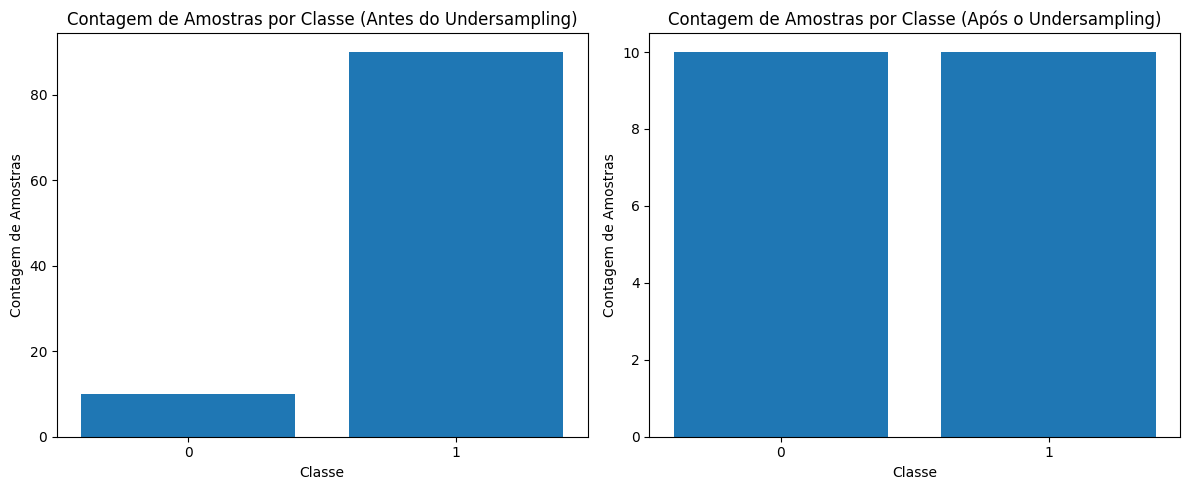

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Calcule a contagem de amostras por classe antes do undersampling
classes, counts = np.unique(y, return_counts=True)

# Calcule a contagem de amostras por classe após o undersampling
resampled_classes, resampled_counts = np.unique(y_resampled, return_counts=True)

# Crie gráficos de barras para visualizar as contagens antes e depois do undersampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(classes, counts, tick_label=classes)
plt.title('Contagem de Amostras por Classe (Antes do Undersampling)')
plt.xlabel('Classe')
plt.ylabel('Contagem de Amostras')

plt.subplot(1, 2, 2)
plt.bar(resampled_classes, resampled_counts, tick_label=resampled_classes)
plt.title('Contagem de Amostras por Classe (Após o Undersampling)')
plt.xlabel('Classe')
plt.ylabel('Contagem de Amostras')

plt.tight_layout()
plt.show()

Neste exemplo, estamos usando o `RandomUnderSampler` para reduzir o número de amostras da classe majoritária, tornando o conjunto de dados mais equilibrado.

Ambas as técnicas, oversampling e undersampling, têm seus lugares em diferentes cenários, e a escolha entre elas depende das características do conjunto de dados e das necessidades do projeto. É importante avaliar o impacto dessas técnicas no desempenho do seu modelo por meio de validação cruzada e métricas de avaliação adequadas.